In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('out/pitchfork_reviews.csv')
df.head()

,artist,album,score,genre,label,reviewer,year,review_date,length,url
0,Jeff Tweedy,Twilight Override,8.0,Rock,dBpm,Elizabeth Nelson,2025.0,2025-09-27,1262,https://www.pitchfork.com/reviews/albums/jeff-...
1,Geese,Getting Killed,9.0,Rock,Partisan / Play It Again Sam,Sam Sodomsky,2025.0,2025-09-26,827,https://www.pitchfork.com/reviews/albums/geese...
2,Piotr Kurek,Songs and Bodies,7.8,Experimental,Unsound,Philip Sherburne,2025.0,2025-09-26,602,https://www.pitchfork.com/reviews/albums/piotr...
3,Paul St. Hilaire,w/ the Producers,7.1,Electronic,Kynant / N.E.W.S.,Daniel Bromfield,2025.0,2025-09-26,556,https://www.pitchfork.com/reviews/albums/paul-...
4,Ø,Sysivalo,8.3,Electronic,Sähkö,Philip Sherburne,2025.0,2025-09-25,1170,https://www.pitchfork.com/reviews/albums/o-sys...


In [7]:
df['artist']

0               Jeff Tweedy
1                     Geese
2               Piotr Kurek
3          Paul St. Hilaire
4                         Ø
               ...         
8921                    NaN
8922          Elliott Smith
8923                   WHY?
8924            DJ Seinfeld
8925    The Magnetic Fields
Name: artist, Length: 8926, dtype: object

In [8]:
artist_id = pd.read_csv('spotify/artist_ids.csv')
artist_id.head()

,artist,artist_id
0,Jeff Tweedy,2rDxtYUzTAYJJE3Bl3Z5IN
1,Geese,0WCo84qtCKfbyIf1lqQWB4
2,Piotr Kurek,0mneo6UHjcOtZBm1Tw8t67
3,Paul St. Hilaire,2z6qOkQVyn7h3XzUuNlRlM
4,Ø,0dgJbQ0bKPyUXco8hEXN7X


In [9]:
artist_followers = pd.read_csv('spotify/artist_followers.csv')
artist_followers

,artist_id,followers_count
0,2rDxtYUzTAYJJE3Bl3Z5IN,106755.0
1,0WCo84qtCKfbyIf1lqQWB4,170530.0
2,0mneo6UHjcOtZBm1Tw8t67,4708.0
3,2z6qOkQVyn7h3XzUuNlRlM,6820.0
4,0dgJbQ0bKPyUXco8hEXN7X,1026730.0
...,...,...
5116,1md0vUYlNIjIoru1Z0ASZB,471.0
5117,4l2MwXYwUDQKHcUXwCZjEz,162613.0
5118,5me0Irg2ANcsgc93uaYrpb,12743048.0
5119,59wfkuBoNyhDMQGCljbUbA,1976491.0


In [10]:
print(len(artist_id))
print(len(artist_id['artist_id'].unique()))

5184
5097


In [11]:
print(len(artist_followers))
print(len(artist_followers['artist_id'].unique()))

5121
5096


In [12]:
follows = pd.merge(artist_followers, artist_id, on='artist_id')

In [24]:
follows

,artist_id,followers_count,artist
0,2rDxtYUzTAYJJE3Bl3Z5IN,106755.0,Jeff Tweedy
1,0WCo84qtCKfbyIf1lqQWB4,170530.0,Geese
2,0mneo6UHjcOtZBm1Tw8t67,4708.0,Piotr Kurek
3,2z6qOkQVyn7h3XzUuNlRlM,6820.0,Paul St. Hilaire
4,0dgJbQ0bKPyUXco8hEXN7X,1026730.0,Ø
...,...,...,...
5225,1md0vUYlNIjIoru1Z0ASZB,471.0,Children of Alice
5226,4l2MwXYwUDQKHcUXwCZjEz,162613.0,José James
5227,5me0Irg2ANcsgc93uaYrpb,12743048.0,The Notorious B.I.G.
5228,59wfkuBoNyhDMQGCljbUbA,1976491.0,Puff Daddy & the Family


In [13]:
df2 = pd.merge(df, follows, how='left', on='artist', indicator='matched')

In [14]:
df2.head()

,artist,album,score,genre,label,reviewer,year,review_date,length,url,artist_id,followers_count,matched
0,Jeff Tweedy,Twilight Override,8.0,Rock,dBpm,Elizabeth Nelson,2025.0,2025-09-27,1262,https://www.pitchfork.com/reviews/albums/jeff-...,2rDxtYUzTAYJJE3Bl3Z5IN,106755.0,both
1,Geese,Getting Killed,9.0,Rock,Partisan / Play It Again Sam,Sam Sodomsky,2025.0,2025-09-26,827,https://www.pitchfork.com/reviews/albums/geese...,0WCo84qtCKfbyIf1lqQWB4,170530.0,both
2,Piotr Kurek,Songs and Bodies,7.8,Experimental,Unsound,Philip Sherburne,2025.0,2025-09-26,602,https://www.pitchfork.com/reviews/albums/piotr...,0mneo6UHjcOtZBm1Tw8t67,4708.0,both
3,Paul St. Hilaire,w/ the Producers,7.1,Electronic,Kynant / N.E.W.S.,Daniel Bromfield,2025.0,2025-09-26,556,https://www.pitchfork.com/reviews/albums/paul-...,2z6qOkQVyn7h3XzUuNlRlM,6820.0,both
4,Ø,Sysivalo,8.3,Electronic,Sähkö,Philip Sherburne,2025.0,2025-09-25,1170,https://www.pitchfork.com/reviews/albums/o-sys...,0dgJbQ0bKPyUXco8hEXN7X,1026730.0,both


In [27]:
len(df2.genre.unique())

281

In [28]:
len(df2)

9039

In [26]:
df2.genre.unique()

array(['Rock', 'Experimental', 'Electronic', 'Electronic / Rock', 'Rap',
       'Electronic / Experimental / Folk/Country', 'Pop/R&B',
       'Folk/Country', 'Pop/R&B / Electronic / Rap', 'Jazz',
       'Pop/R&B / Rock', 'Metal', 'Electronic / Pop/R&B',
       'Jazz / Rock / Experimental', 'Metal / Rock', 'Pop/R&B / Jazz',
       'Which?', 'Folk/Country / Rock', 'Rap / Rock',
       'Rock / Experimental', 'Experimental / Pop/R&B', 'Rap / Pop/R&B',
       'Rap / Experimental', 'Electronic / Experimental',
       'Electronic / Rap', 'Experimental / Electronic',
       'Electronic / Rock / Experimental', '+ambién',
       'Folk/Country / Pop/R&B', 'Rock / Electronic / Folk/Country',
       'Rap / Electronic', 'Electronic / Experimental / Jazz',
       'Pop/R&B / Electronic', 'Jazz / Experimental',
       'Experimental / Rap', 'Rock / Electronic',
       'Experimental / Folk/Country', 'Rock / Experimental / Jazz',
       'Experimental / Rock', 'Rock / Pop/R&B', 'Experimental / Jazz',
    

In [15]:
import seaborn as sns

<Axes: xlabel='length', ylabel='score'>

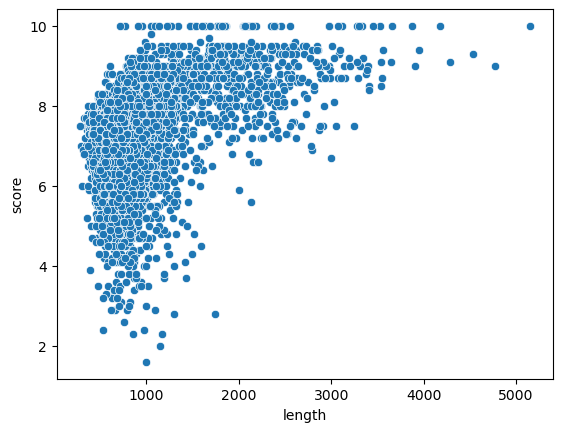

In [23]:
sns.scatterplot(df2, x='length', y='score')

<Axes: xlabel='followers_count', ylabel='score'>

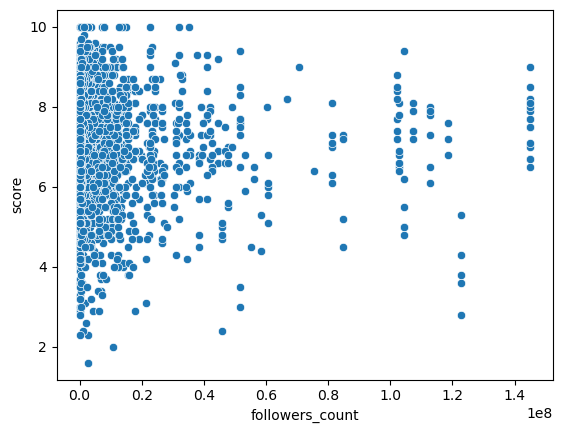

In [17]:
sns.scatterplot(data=df2, x='followers_count', y='score')

<Axes: xlabel='followers_count', ylabel='score'>

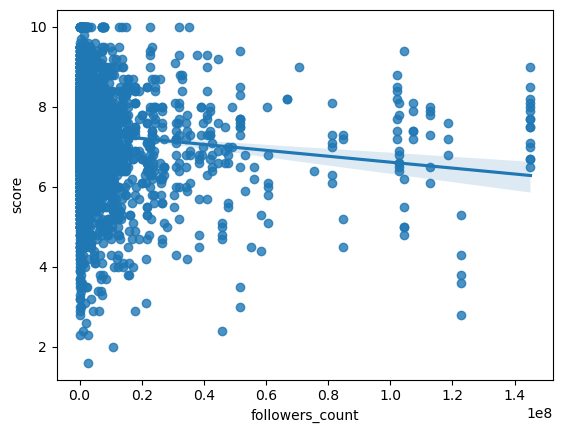

In [18]:
sns.regplot(x='followers_count', y='score', data=df2)

In [25]:
sum(df2['matched'] != 'both')

5

In [19]:
sum(df2['followers_count'].isna())

5

<Axes: xlabel='followers_count', ylabel='Count'>

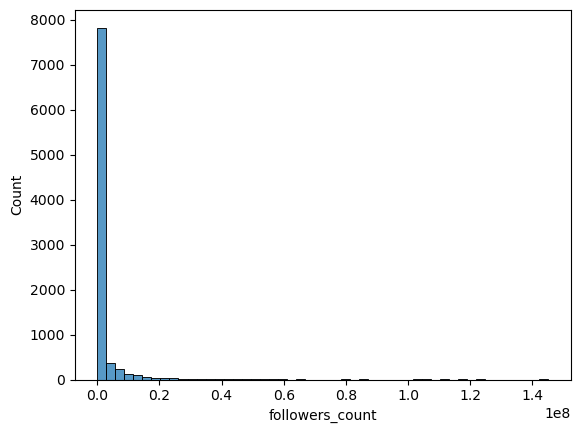

In [20]:
sns.histplot(df2['followers_count'], bins=50)

In [21]:
df2['followers_count'].describe()

count    9.034000e+03
mean     2.728657e+06
std      1.131909e+07
min      0.000000e+00
25%      1.920550e+04
50%      1.194705e+05
75%      7.926530e+05
max      1.450969e+08
Name: followers_count, dtype: float64

In [22]:
df2.groupby('reviewer').size().sort_values(ascending=False).head(30)

reviewer
Philip Sherburne           434
Ian Cohen                  225
Stuart Berman              218
Alphonse Pierre            191
Sam Sodomsky               185
Andy Beta                  181
Ben Cardew                 176
Sheldon Pearce             161
Grayson Haver Currin       155
Evan Rytlewski             153
Dylan Green                151
Stephen Thomas Erlewine    139
Sasha Geffen               119
Stephen M. Deusner         117
Stephen Kearse             111
Jayson Greene              107
Nina Corcoran              105
Paul A. Thompson           103
Arielle Gordon             101
Eric Torres                 99
Madison Bloom               99
Daniel Bromfield            94
Nadine Smith                87
Matthew Ismael Ruiz         85
Shaad D’Souza               79
Dean Van Nguyen             79
Quinn Moreland              76
Sam Goldner                 73
Andy Cush                   72
Brian Howe                  72
dtype: int64